In [42]:
import pandas as pd

In [49]:
df=pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [50]:
df['date']=pd.to_datetime(df['date'])
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [51]:
df=df.set_index(df['date'])
df

,date,precipitation,temp_max,temp_min,wind,weather
date,,,,,,
2012-01-01,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
2015-12-27,2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,2015-12-29,0.0,7.2,0.6,2.6,fog


In [52]:
df=df.drop(columns=['date'])
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [61]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['weather']=encoder.fit_transform(df['weather'])
df=df['weather']
df

,weather
date,
2012-01-01,0
2012-01-02,2
2012-01-03,2
2012-01-04,2
2012-01-05,2
...,...
2015-12-27,2
2015-12-28,2
2015-12-29,1


In [62]:
from statsmodels.tsa.stattools import adfuller

def adtest(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print("1. ADF :",dftest[0])
  print("2. P-Value: ",dftest[1])
  print("3. Num of Lags: ",dftest[2])
  print("4. Num Of Observations Used For ADF Regression: ",dftest[3])
  print("5. Critical Values: ")

  for key,val in dftest[4].items():
    print("\t",key,": ",val)

adtest(df)

1. ADF : -5.171508486696189
2. P-Value:  1.0049293352137119e-05
3. Num of Lags:  17
4. Num Of Observations Used For ADF Regression:  1443
5. Critical Values: 
	 1% :  -3.434889827343955
	 5% :  -2.863545026607168
	 10% :  -2.5678374612882515


In [68]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df,trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4387.120, Time=4.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4984.198, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4726.515, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4465.094, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4982.204, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4380.873, Time=1.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4397.155, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4383.998, Time=1.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4382.806, Time=2.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4385.109, Time=1.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4380.993, Time=1.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4384.868, Time=3.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4378.874, Time=2.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4395.155, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [69]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1461,)
(1431,) (30,)


In [87]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(1,1,2))
model= model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                weather   No. Observations:                 1461
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2185.437
Date:                Wed, 23 Oct 2024   AIC                           4378.874
Time:                        06:53:31   BIC                           4400.019
Sample:                    01-01-2012   HQIC                          4386.762
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4768      0.082      5.826      0.000       0.316       0.637
ma.L1         -1.1851      0.089    -13.321      0.000      -1.359      -1.011
ma.L2          0.2146      0.083      2.588      0.010       0.052       0.377
sigma2         1.1671      0.047     24.774      0.000       1.075       1.259
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                45.11
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.43
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

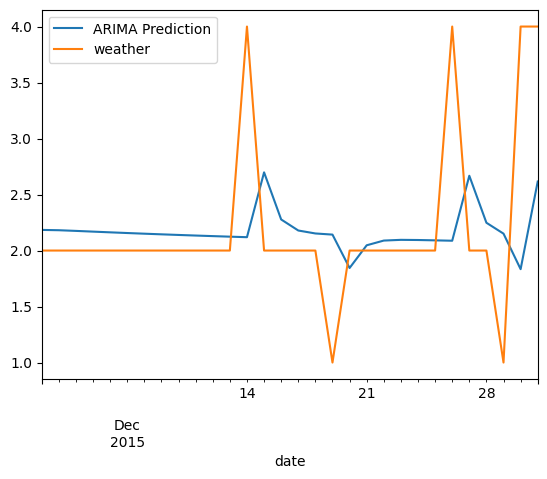

In [88]:
start=len(train)
end=len(train) + len(test) -1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Prediction')
pred.plot(legend=True)
test.plot(legend=True)

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

0.7726353968688746


In [91]:
model2=ARIMA(df,order=(1,1,2))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,weather
date,
2015-12-27,2
2015-12-28,2
2015-12-29,1
2015-12-30,4
2015-12-31,4


In [95]:
index_future_dates=pd.date_range(start='2016-01-01',end='2016-01-31')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2016-01-01    2.825029
2016-01-02    2.561830
2016-01-03    2.436344
2016-01-04    2.376516
2016-01-05    2.347992
2016-01-06    2.334392
2016-01-07    2.327908
2016-01-08    2.324817
2016-01-09    2.323343
2016-01-10    2.322640
2016-01-11    2.322305
2016-01-12    2.322145
2016-01-13    2.322069
2016-01-14    2.322033
2016-01-15    2.322016
2016-01-16    2.322007
2016-01-17    2.322003
2016-01-18    2.322002
2016-01-19    2.322001
2016-01-20    2.322000
2016-01-21    2.322000
2016-01-22    2.322000
2016-01-23    2.322000
2016-01-24    2.322000
2016-01-25    2.322000
2016-01-26    2.322000
2016-01-27    2.322000
2016-01-28    2.322000
2016-01-29    2.322000
2016-01-30    2.322000
2016-01-31    2.322000
Freq: D, Name: ARIMA Predictions, dtype: float64
